Importing the Dependencies

In [461]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest

 DAY 1
 Step 1: Problem statement and data collection

In [462]:
airbnb_data = pd.read_csv("/Users/nandapop/Documents/Bootcamp/airbnbNY/machine-learning-python-template/data/raw/AB_NYC_2019.csv")
airbnb_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [463]:
#Info about Data
airbnb_data.shape
airbnb_data.info()
airbnb_data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [464]:
airbnb_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Step 2: Exploration and data cleaning

In [465]:
#Finding duplicates
#duplicates = airbnb_data.duplicated().sum
#There is't  duplicate data

#Eliminate irrelevant information
#name and hostname there are sensible data
# The analysis will focus on pricing trends, types of rooms, so host_id will be not neccesary
# Column reviews_per_month : this mean the apartement has several guest and can identify trends and tendencies per year 
unneeded_columns = ['id','name','host_id','host_name','last_review']
airbnb_data = airbnb_data.drop(unneeded_columns,axis = 1)
airbnb_data.head()
airbnb_data.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [466]:
#Replacing with null values of column 'reviews_per_month' with 0
airbnb_data['reviews_per_month'] = airbnb_data['reviews_per_month'].fillna(0)
airbnb_data.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Step 3: Analysis of univariate variables

Analysis on categorical variables

In [467]:
categorical_values = airbnb_data.select_dtypes(include=[object])
print("categorical",categorical_values.head() )

categorical   neighbourhood_group neighbourhood        room_type
0            Brooklyn    Kensington     Private room
1           Manhattan       Midtown  Entire home/apt
2           Manhattan        Harlem     Private room
3            Brooklyn  Clinton Hill  Entire home/apt
4           Manhattan   East Harlem  Entire home/apt


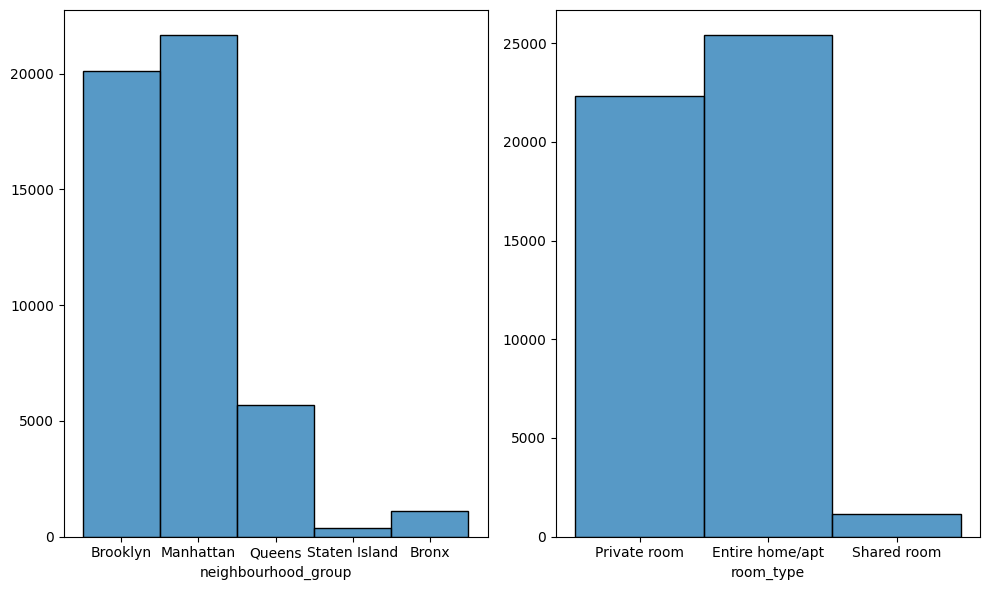

In [468]:
fig, axis = plt.subplots(1,2,figsize = (10,6)) 
sns.histplot(ax= axis [0], data = airbnb_data, x = "neighbourhood_group").set(ylabel = None) 
sns.histplot(ax = axis [1],data = airbnb_data, x = "room_type").set(ylabel = None) 
plt.tight_layout()
plt.savefig(r"/Users/nandapop/Documents/Bootcamp/airbnbNY/machine-learning-python-template/data/categorical_values.png")
plt.show()

In [469]:
'''value_counts() to determine the cardinality of the values (number of Listings per neighborhood Group)
how many different neighborhood groups exist'''
unique = airbnb_data.neighbourhood_group.unique()
unique

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [470]:
len_neighbourhood = len(airbnb_data.neighbourhood.unique())
len_neighbourhood

221

In [471]:
unique = airbnb_data.neighbourhood.unique()
unique

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

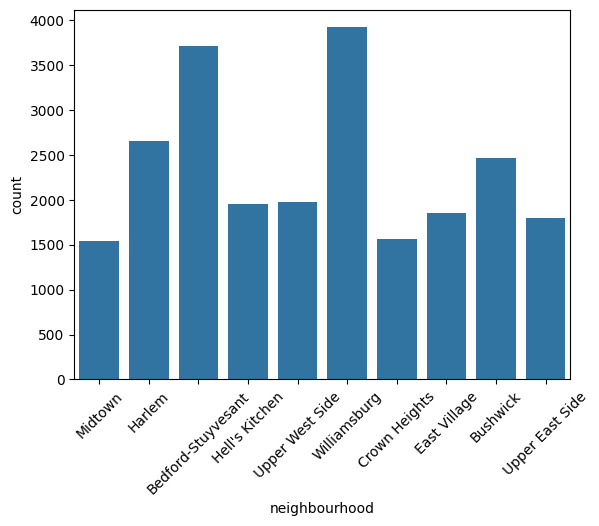

In [472]:
#analisis with countplot
neighbourhood = airbnb_data['neighbourhood'].value_counts()
top_10_neighbourhoods = neighbourhood.iloc[0:10].index
top_10_neighbourhood_data = airbnb_data[airbnb_data['neighbourhood'].isin(top_10_neighbourhoods)]
sns.countplot(data=top_10_neighbourhood_data, x= "neighbourhood")
plt.xticks(rotation=45)
plt.savefig(r"/Users/nandapop/Documents/Bootcamp/airbnbNY/machine-learning-python-template/data/top_10_neighbourhood_data.png")
plt.show()

Analysis on numerical variables

In [473]:
numerical_values = airbnb_data.select_dtypes(include=['int64', 'float64'])
print("numerical",numerical_values)

numerical        latitude  longitude  price  minimum_nights  number_of_reviews  \
0      40.64749  -73.97237    149               1                  9   
1      40.75362  -73.98377    225               1                 45   
2      40.80902  -73.94190    150               3                  0   
3      40.68514  -73.95976     89               1                270   
4      40.79851  -73.94399     80              10                  9   
...         ...        ...    ...             ...                ...   
48890  40.67853  -73.94995     70               2                  0   
48891  40.70184  -73.93317     40               4                  0   
48892  40.81475  -73.94867    115              10                  0   
48893  40.75751  -73.99112     55               1                  0   
48894  40.76404  -73.98933     90               7                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.21                        

In [474]:
'''Plots with columns minimum_nights and calculated_host_listings_count are no visible. The st of 20.5 nights is 
large compared to the mean also calculated_host_listings_count
describe to this columns'''

stats = airbnb_data[['minimum_nights', 'calculated_host_listings_count']].describe()
stats

,minimum_nights,calculated_host_listings_count
count,48895.000000,48895.000000
mean,7.029962,7.143982
std,20.510550,32.952519
min,1.000000,1.000000
25%,1.000000,1.000000
50%,3.000000,1.000000
75%,5.000000,2.000000
max,1250.000000,327.000000


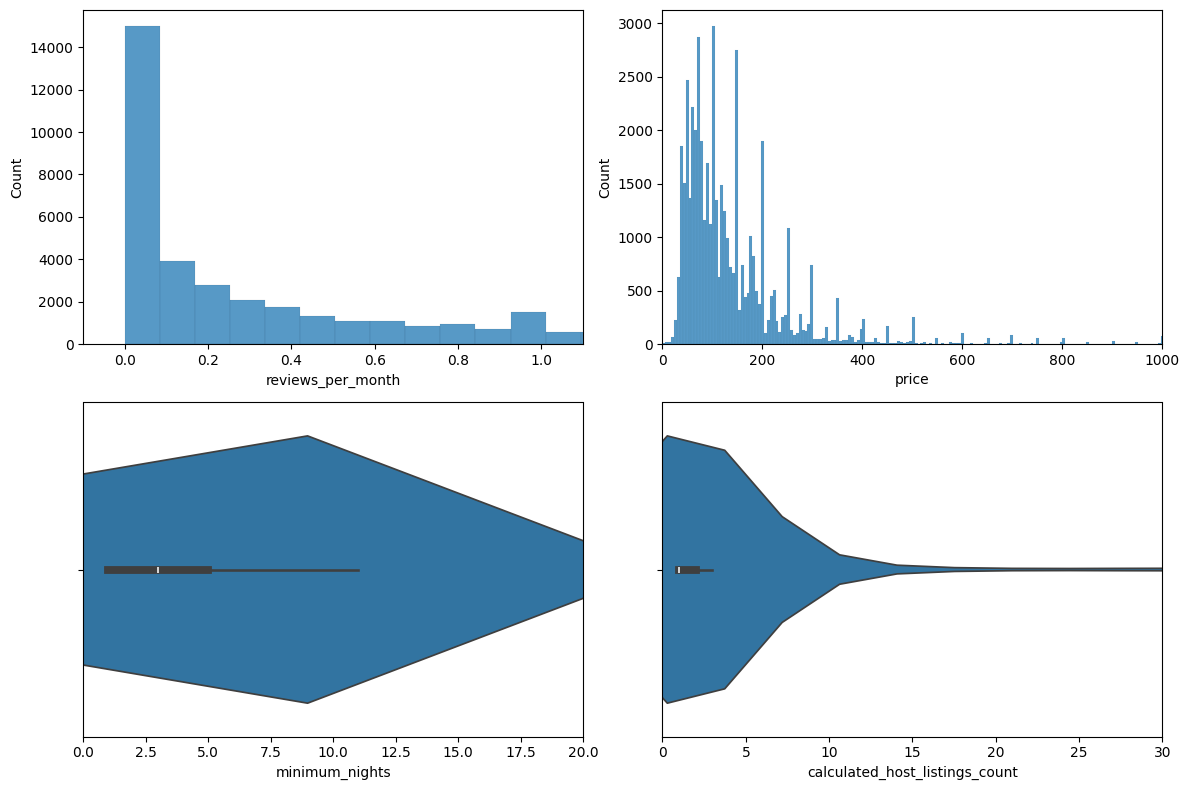

In [475]:
fig, axis = plt.subplots(2,2,figsize = (12,8)) 
#Number or reviews per month: with high reviews per month, it can suggests many listing per high demant 
sns.histplot(ax= axis [0][0], data = airbnb_data, x = "reviews_per_month").set_xlim(-0.1, 1.1)
#There is a lot of properties under 200 dollars.
sns.histplot(ax = axis [0][1],data = airbnb_data, x= "price").set_xlim(0, 1000)
#Some properties required minimun of nichts to stay and the wide area of the violin plots indicates the minimum stay
sns.violinplot(ax= axis [1][0], data = airbnb_data, x = "minimum_nights").set_xlim(0, 20)#set to 20 for besser visibility
#The long tail indicates that is not very common host with many listening
sns.violinplot(ax= axis [1][1], data = airbnb_data, x = "calculated_host_listings_count").set_xlim(0, 30)#set to 30 for besser visibility
plt.tight_layout()
plt.savefig(r"/Users/nandapop/Documents/Bootcamp/airbnbNY/machine-learning-python-template/data/numerical_values.png")
plt.show()

Step 4: Analysis of multivariate variables

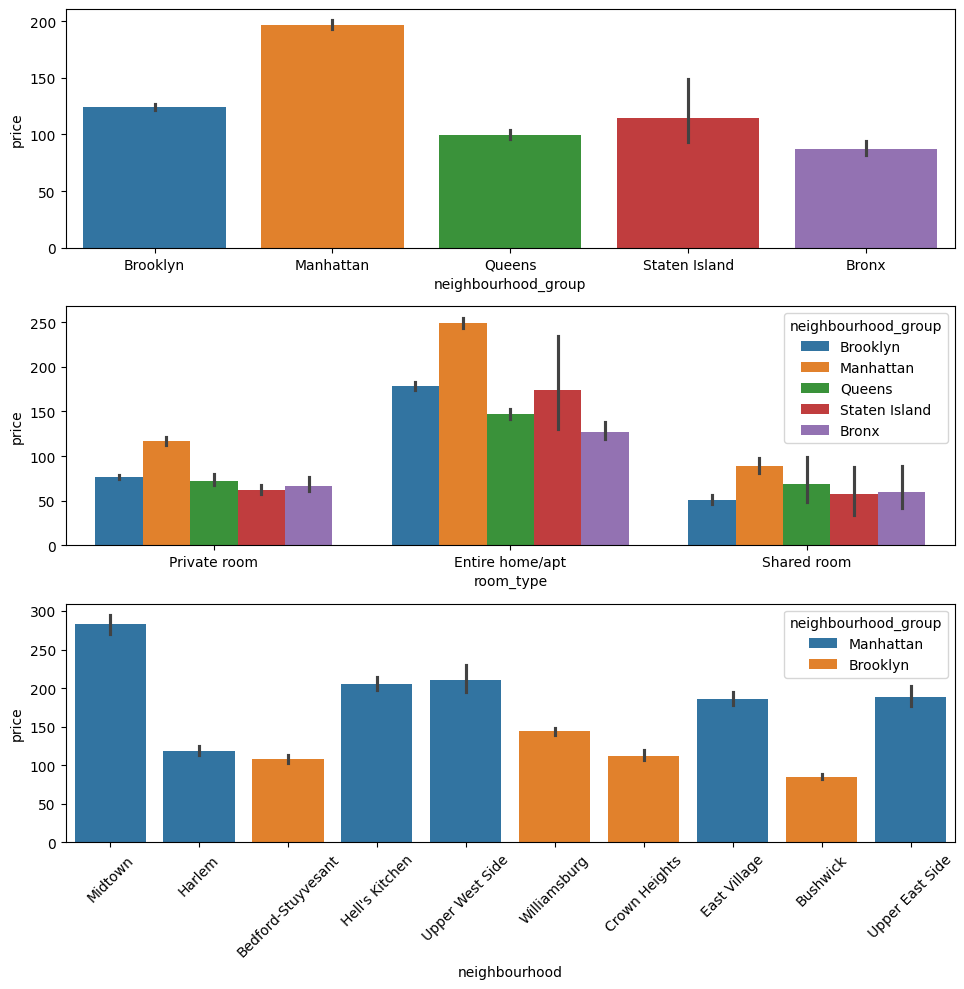

'We can conclude that Manhattan has the highest price in the neighbourhood group and highest price per room type.\nMidtown has the highest price per neighbourhood group\nBroklynn has more review per neighbourhood group\nManhattan has the mayortity of properties per neighbourhood group\n'

In [476]:
fig, axis = plt.subplots(3,1, figsize = (12,10))
sns.barplot(ax = axis[0], x= "neighbourhood_group",y = "price",data= airbnb_data, hue= "neighbourhood_group")
sns.barplot(ax = axis[1], x= "room_type", y = "price", data= airbnb_data,  hue= "neighbourhood_group")
sns.barplot(ax = axis[2], x= "neighbourhood", y = "price", data= top_10_neighbourhood_data, hue= "neighbourhood_group")
axis[2].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.subplots_adjust(right=0.8)
plt.savefig(r"/Users/nandapop/Documents/Bootcamp/airbnbNY/machine-learning-python-template/data/multivariable_values.png")
plt.show()
'''We can conclude that Manhattan has the highest price in the neighbourhood group and highest price per room type.
Midtown has the highest price per neighbourhood group
Broklynn has more review per neighbourhood group
Manhattan has the mayortity of properties per neighbourhood group
'''

Numerical-numerical analysis

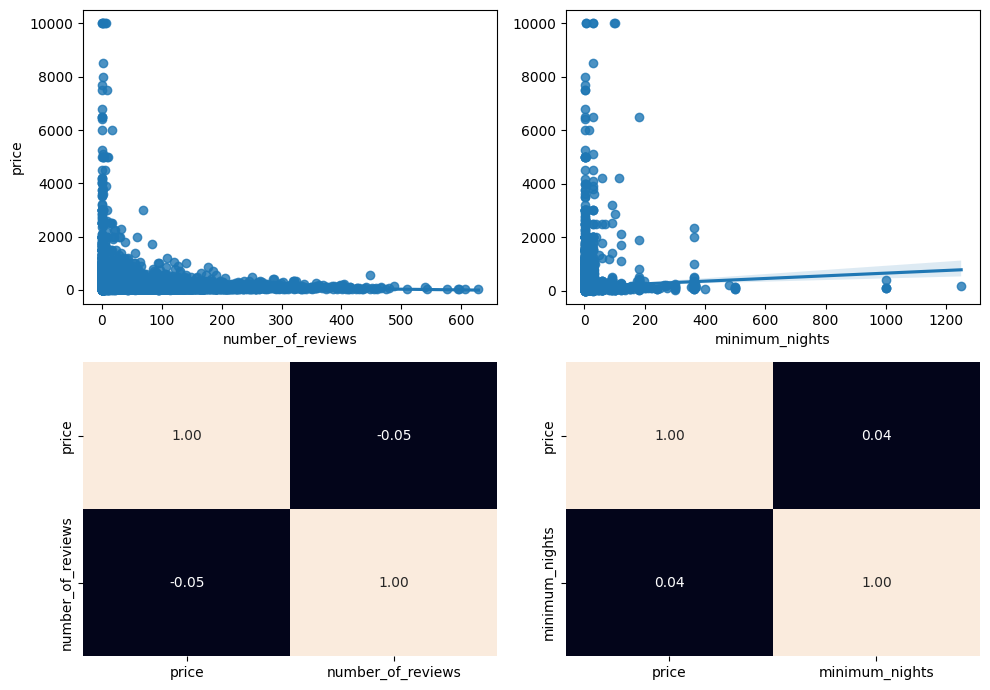

In [477]:
fig, axis = plt.subplots(2,2, figsize=(10,7))
sns.regplot(ax=axis[0,0], data= airbnb_data, x ="number_of_reviews", y ="price")
sns.heatmap(airbnb_data[["price", "number_of_reviews"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
sns.regplot(ax=axis[0,1], data=airbnb_data, x ="minimum_nights", y ="price").set(ylabel=None)
sns.heatmap(airbnb_data[["price", "minimum_nights"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)
plt.tight_layout()
plt.savefig(r"/Users/nandapop/Documents/Bootcamp/airbnbNY/machine-learning-python-template/data/numerical_numerical_analisis.png")
plt.show()

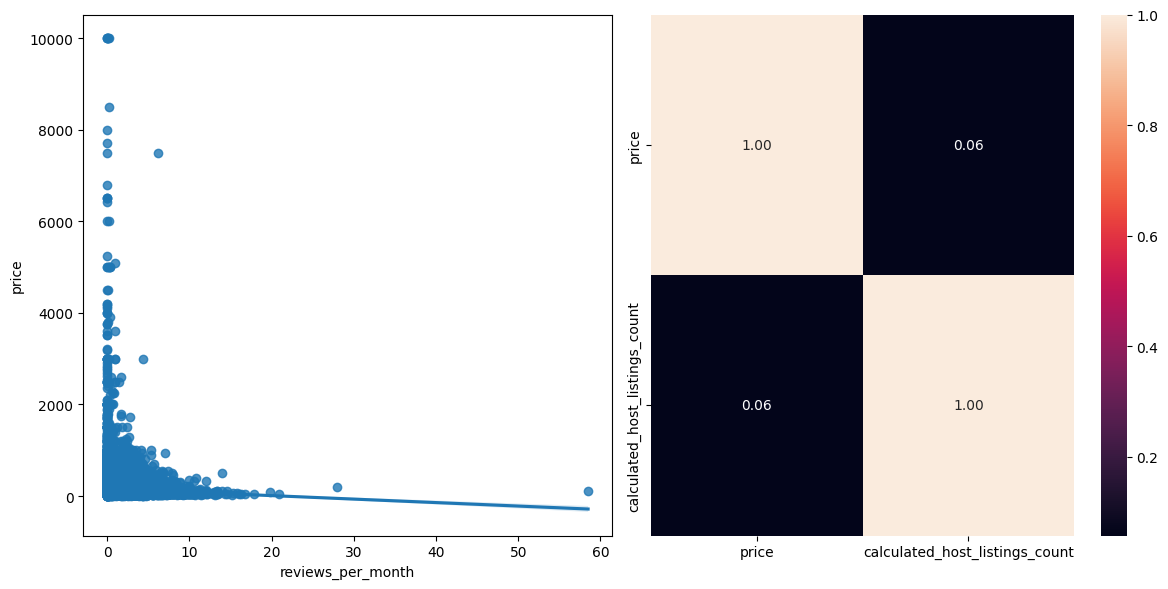

In [478]:
'''generating a heatmap to identify pairs of variables that have strong correlations (positive or negative).'''
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.regplot( data = airbnb_data, x = "reviews_per_month", y = "price",ax=ax[0])
sns.heatmap(airbnb_data[["price", "calculated_host_listings_count"]].corr(),annot = True, fmt = ".2f",ax=ax[1])
plt.tight_layout()
plt.savefig(r"/Users/nandapop/Documents/Bootcamp/airbnbNY/machine-learning-python-template/data/heatmap_2_variables.png")
plt.show()

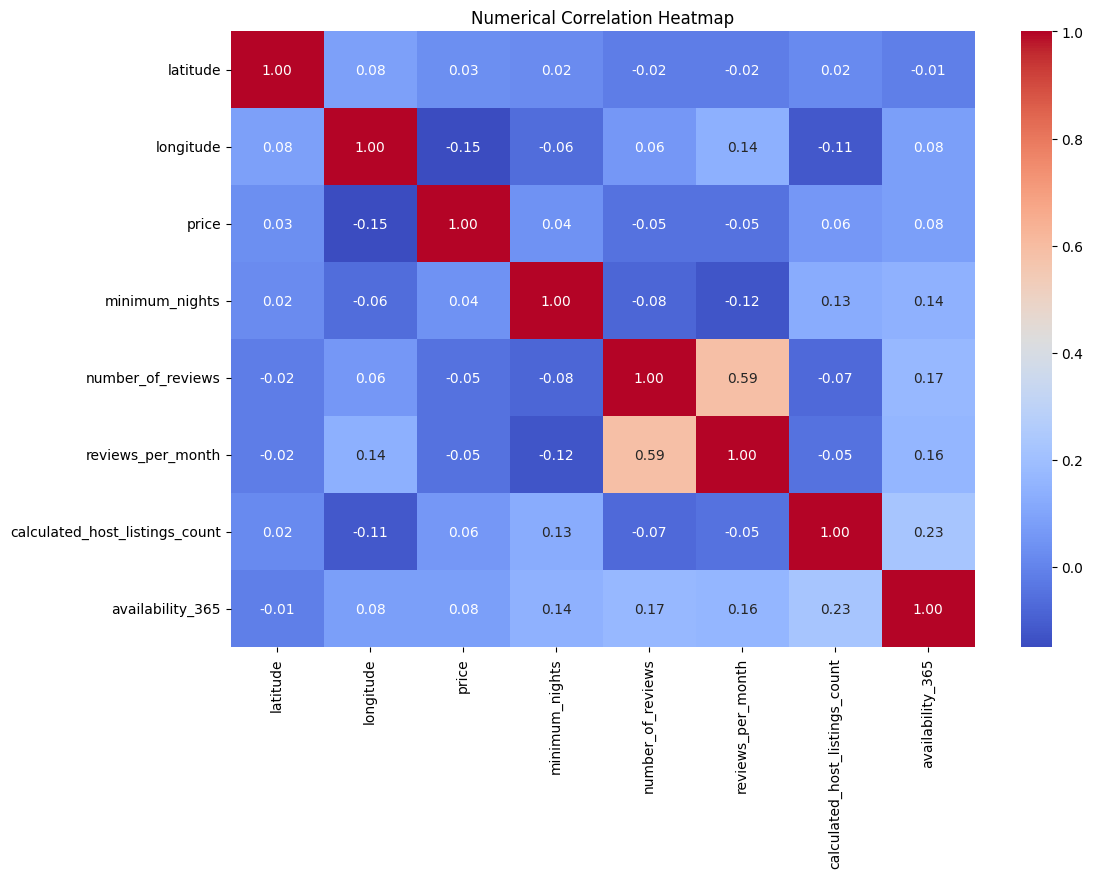

"'Here doesn't exist strong correlation\n"

In [479]:
#correlation only with numerical variables
data = airbnb_data.select_dtypes(include=[float, int])
corr_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Numerical Correlation Heatmap')
plt.savefig(r"/Users/nandapop/Documents/Bootcamp/airbnbNY/machine-learning-python-template/data/numerical_corr_heatmap.png")
plt.show()
''''Here doesn't exist strong correlation
'''

Categorical-categorical analysis

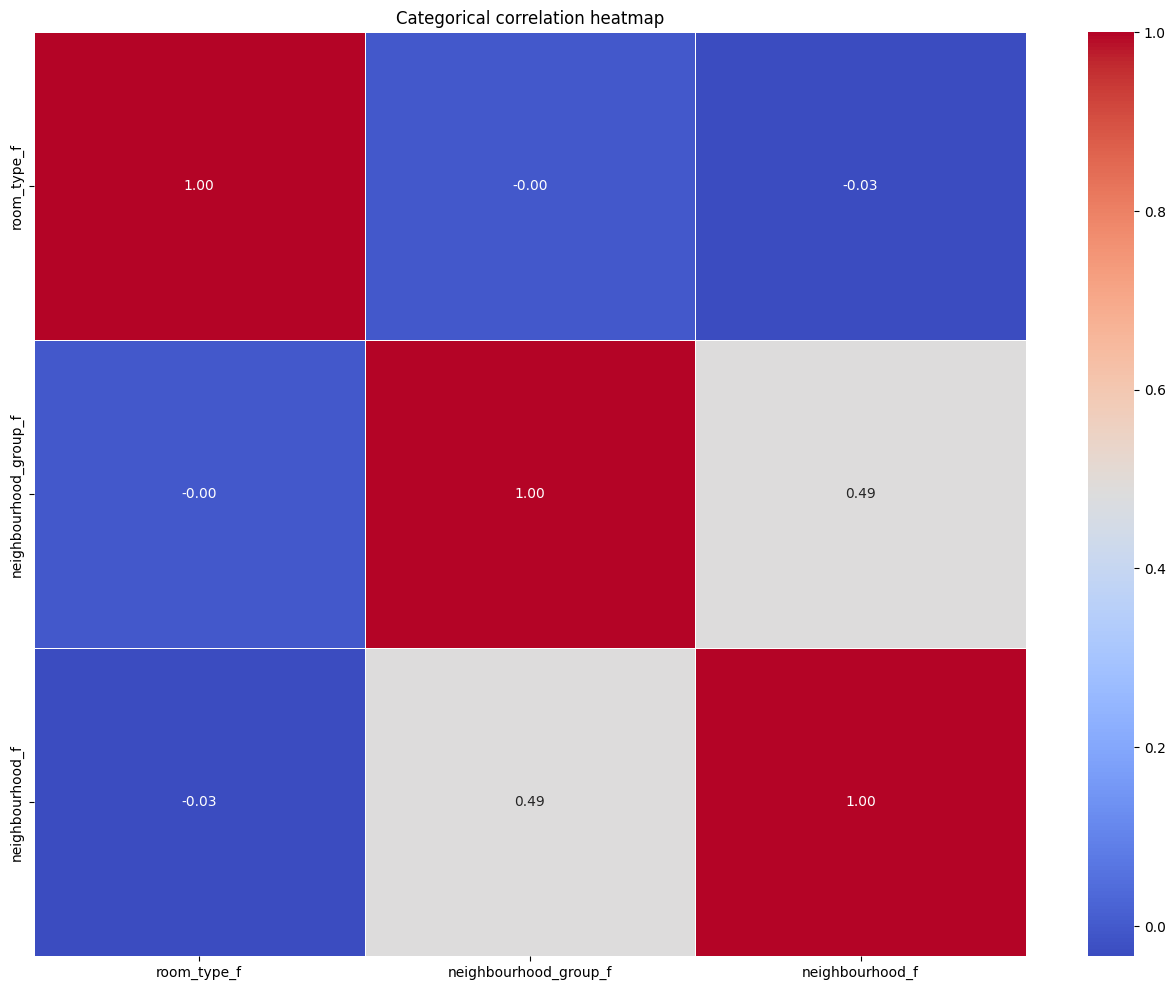

In [480]:
#Selecting only 1 column [0] because the data is big

airbnb_data["room_type_f"] = pd.factorize(airbnb_data["room_type"])[0]
airbnb_data["neighbourhood_group_f"] = pd.factorize(airbnb_data["neighbourhood_group"])[0]
airbnb_data["neighbourhood_f"] = pd.factorize(airbnb_data["neighbourhood"])[0]

plt.figure(figsize=(16, 12))
sns.heatmap(airbnb_data[["room_type_f", "neighbourhood_group_f", "neighbourhood_f"]].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Categorical correlation heatmap')
plt.savefig(r"/Users/nandapop/Documents/Bootcamp/airbnbNY/machine-learning-python-template/data/categorical_corr_heatmap.png")
plt.show()

In [481]:
airbnb_data[["room_type_f", "neighbourhood_group_f", "neighbourhood_f","price", "minimum_nights", "availability_365", "number_of_reviews", "reviews_per_month"]].corr()


,room_type_f,neighbourhood_group_f,neighbourhood_f,price,minimum_nights,availability_365,number_of_reviews,reviews_per_month
room_type_f,1.000000,-0.004441,-0.033644,0.206027,0.066767,0.026502,-0.022445,-0.028255
neighbourhood_group_f,-0.004441,1.000000,0.486304,0.002672,-0.000739,0.123287,0.011454,0.078036
neighbourhood_f,-0.033644,0.486304,1.000000,-0.054963,-0.028344,0.124145,0.010791,0.098772
price,0.206027,0.002672,-0.054963,1.000000,0.042799,0.081829,-0.047954,-0.050564
minimum_nights,0.066767,-0.000739,-0.028344,0.042799,1.000000,0.144303,-0.080116,-0.124905
availability_365,0.026502,0.123287,0.124145,0.081829,0.144303,1.000000,0.172028,0.163732
number_of_reviews,-0.022445,0.011454,0.010791,-0.047954,-0.080116,0.172028,1.000000,0.589407
reviews_per_month,-0.028255,0.078036,0.098772,-0.050564,-0.124905,0.163732,0.589407,1.000000


In [482]:
airbnb_data[["room_type","room_type_f", "neighbourhood_group","neighbourhood_group_f","neighbourhood","neighbourhood_f"]]


,room_type,room_type_f,neighbourhood_group,neighbourhood_group_f,neighbourhood,neighbourhood_f
0,Private room,0,Brooklyn,0,Kensington,0
1,Entire home/apt,1,Manhattan,1,Midtown,1
2,Private room,0,Manhattan,1,Harlem,2
3,Entire home/apt,1,Brooklyn,0,Clinton Hill,3
4,Entire home/apt,1,Manhattan,1,East Harlem,4
...,...,...,...,...,...,...
48890,Private room,0,Brooklyn,0,Bedford-Stuyvesant,6
48891,Private room,0,Brooklyn,0,Bushwick,21
48892,Entire home/apt,1,Manhattan,1,Harlem,2
48893,Shared room,2,Manhattan,1,Hell's Kitchen,7


Complete Numerical-categorical analysis

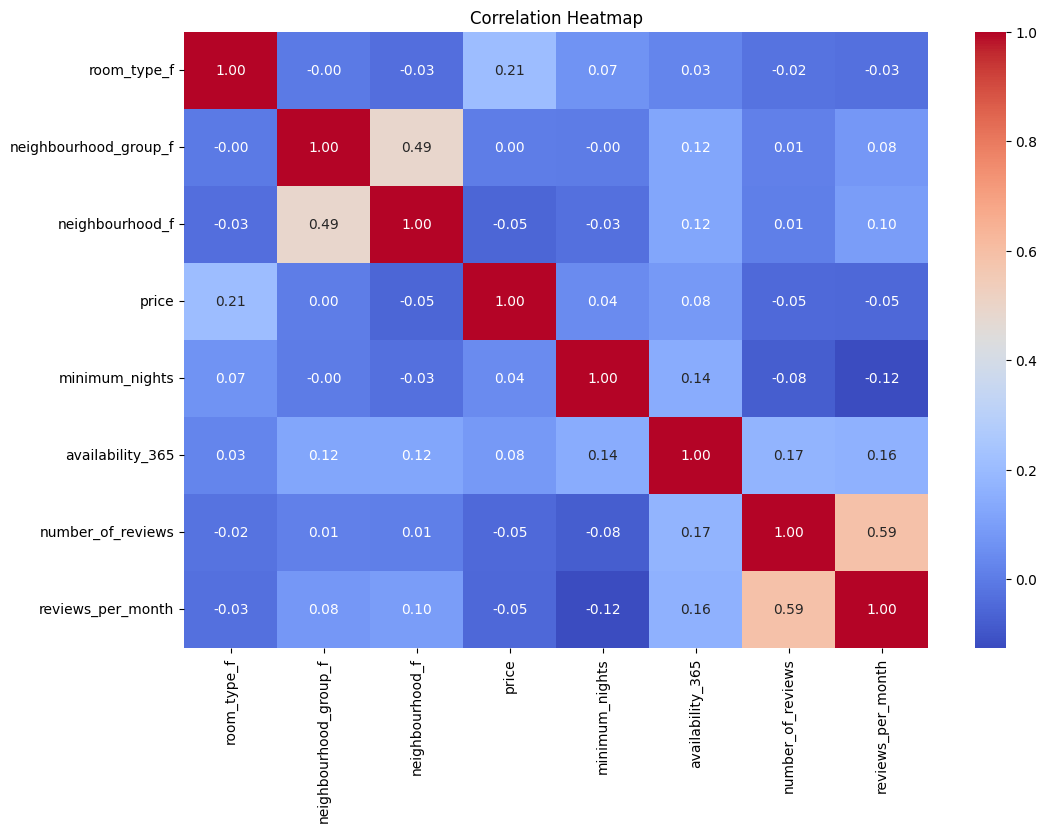

In [483]:
plt.figure(figsize=(12, 8))
sns.heatmap(airbnb_data[["room_type_f", "neighbourhood_group_f", "neighbourhood_f","price", "minimum_nights", "availability_365", "number_of_reviews", "reviews_per_month"]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig(r"/Users/nandapop/Documents/Bootcamp/airbnbNY/machine-learning-python-template/data/categorical_corr_heatmap.png")
plt.show()

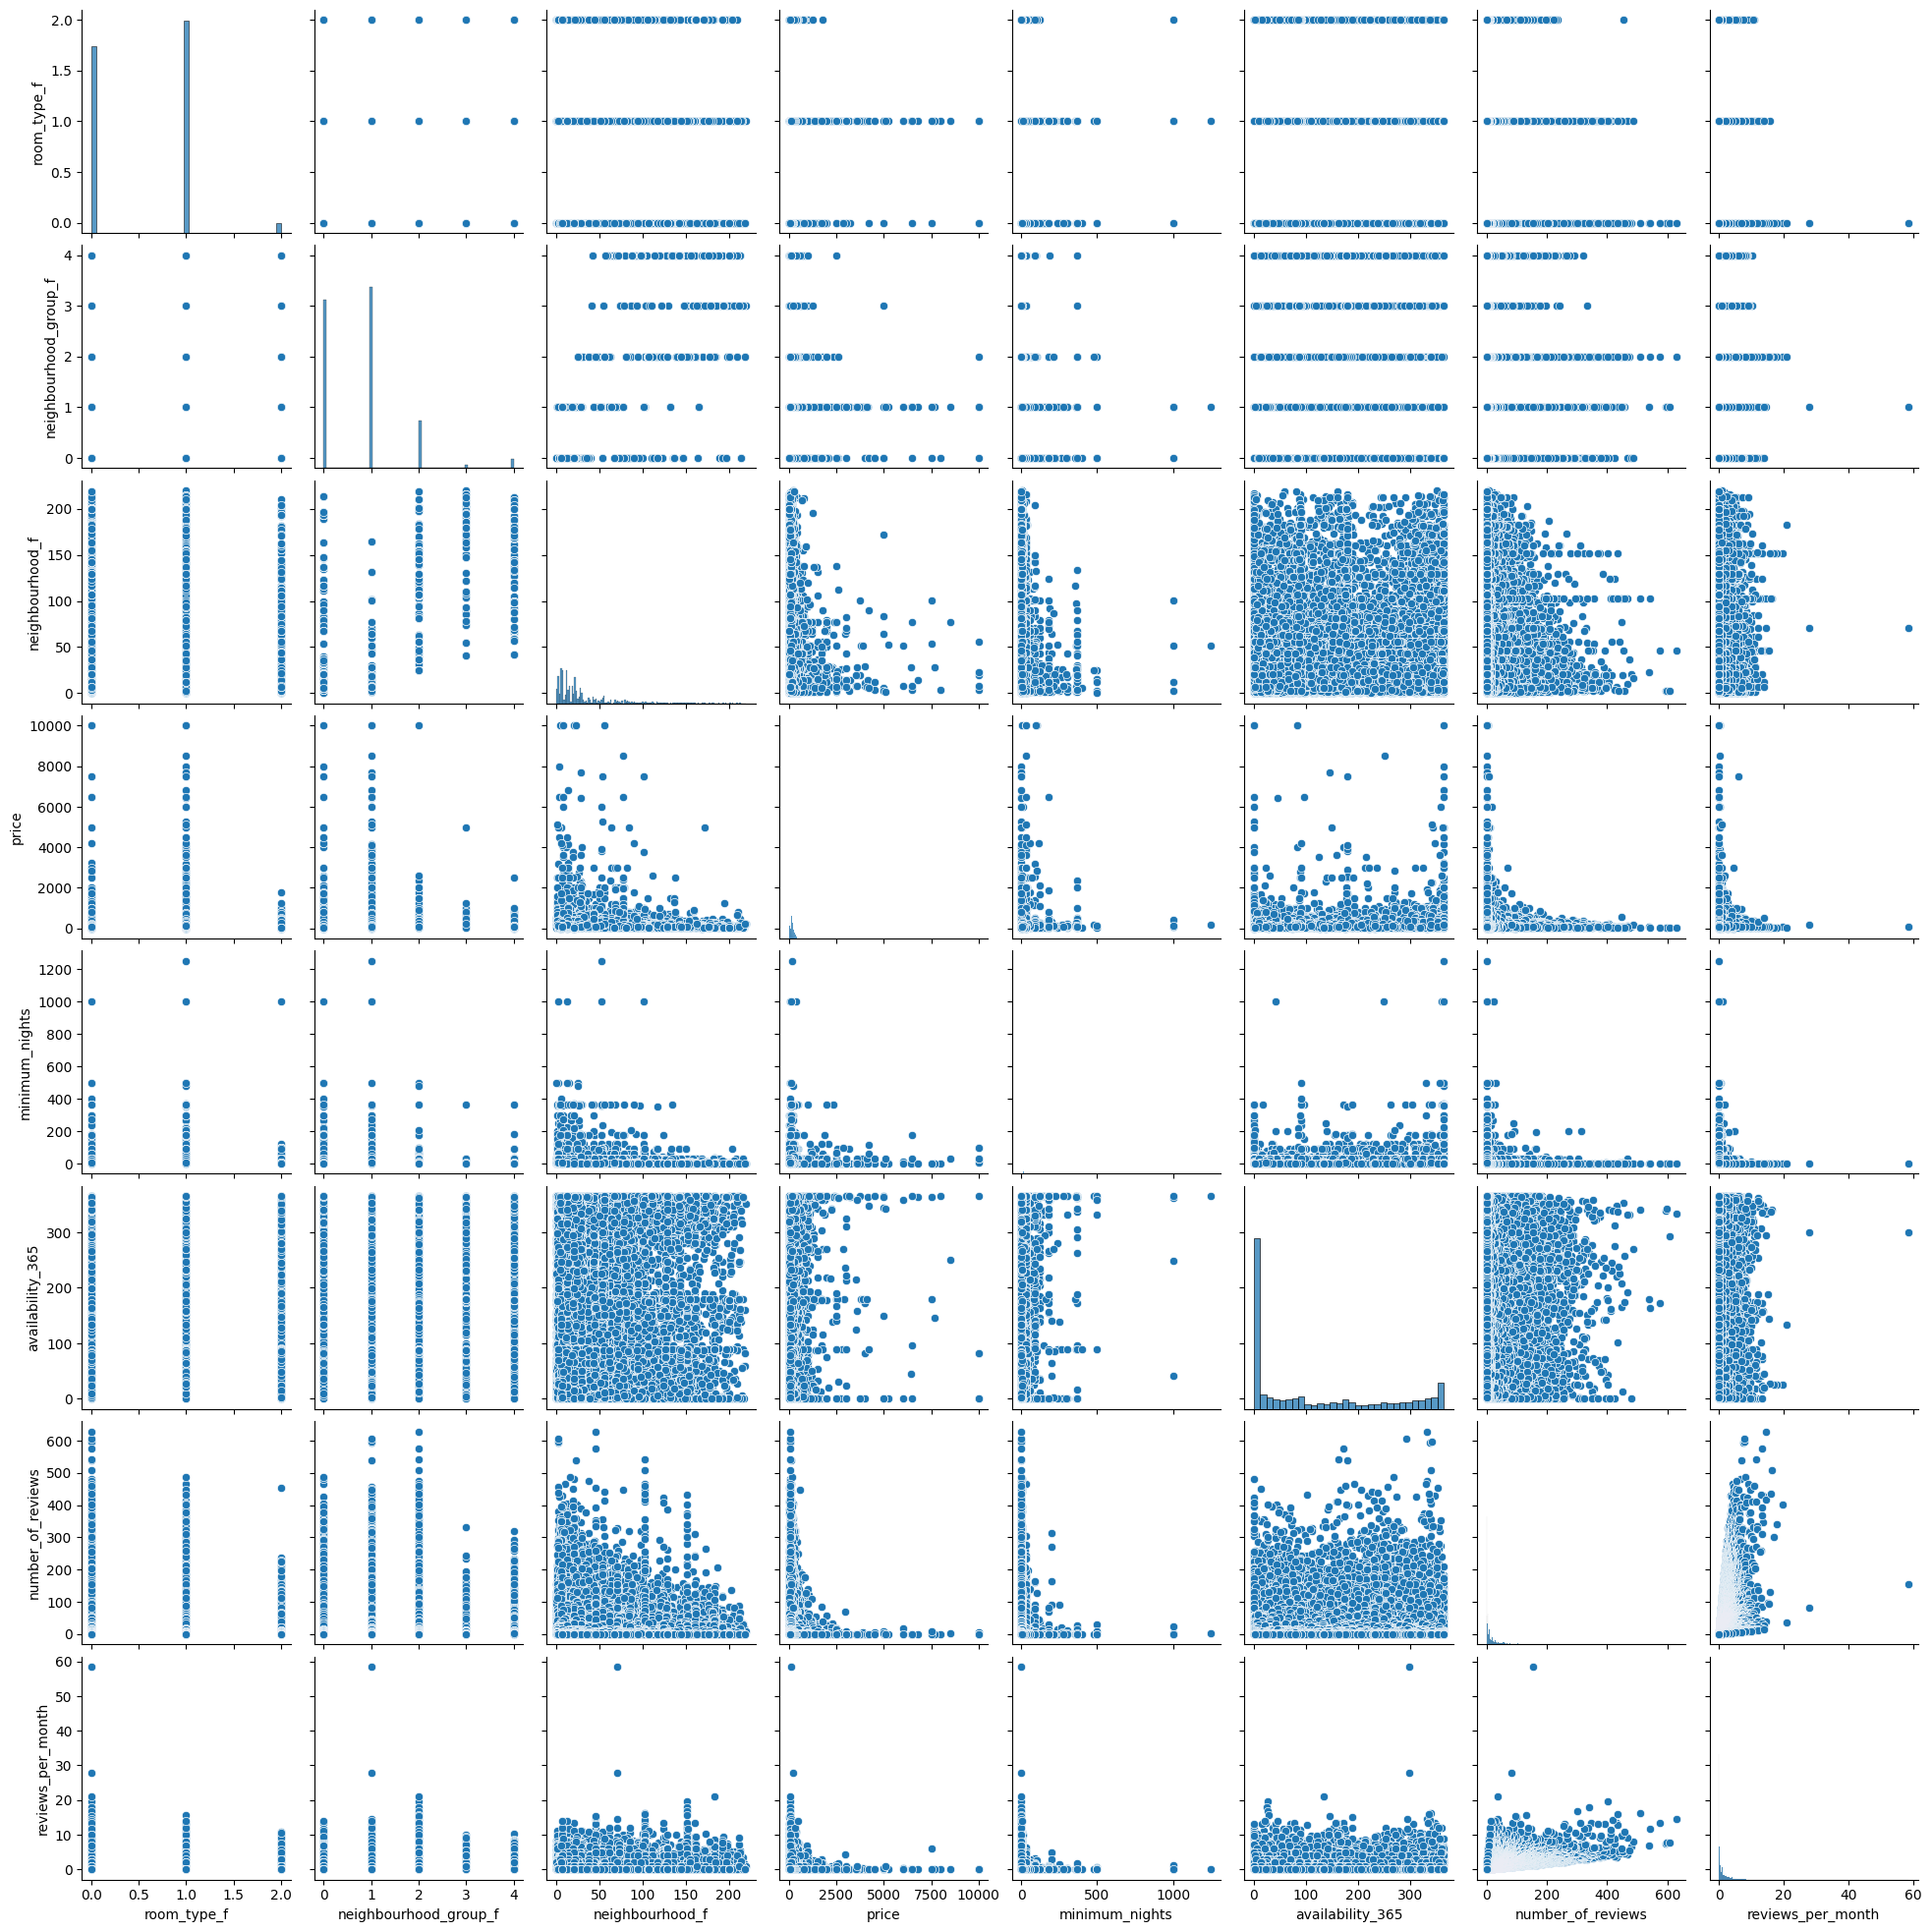

In [484]:
total_data = airbnb_data[["room_type_f", "neighbourhood_group_f", "neighbourhood_f","price", "minimum_nights", "availability_365", "number_of_reviews", "reviews_per_month"]]
sns.pairplot(data = total_data)
plt.savefig(r"/Users/nandapop/Documents/Bootcamp/airbnbNY/machine-learning-python-template/data/pairplot.png")

DAY 2
Step 5: Feature engineering

In [485]:
total_data.describe()


,room_type_f,neighbourhood_group_f,neighbourhood_f,price,minimum_nights,availability_365,number_of_reviews,reviews_per_month
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,0.567113,0.786911,29.888782,152.720687,7.029962,112.781327,23.274466,1.090910
std,0.541249,0.844386,34.676634,240.154170,20.510550,131.622289,44.550582,1.597283
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.500000,69.000000,1.000000,0.000000,1.000000,0.040000
50%,1.000000,1.000000,19.000000,106.000000,3.000000,45.000000,5.000000,0.370000
75%,1.000000,1.000000,37.000000,175.000000,5.000000,227.000000,24.000000,1.580000
max,2.000000,4.000000,220.000000,10000.000000,1250.000000,365.000000,629.000000,58.500000


Outlier analysis

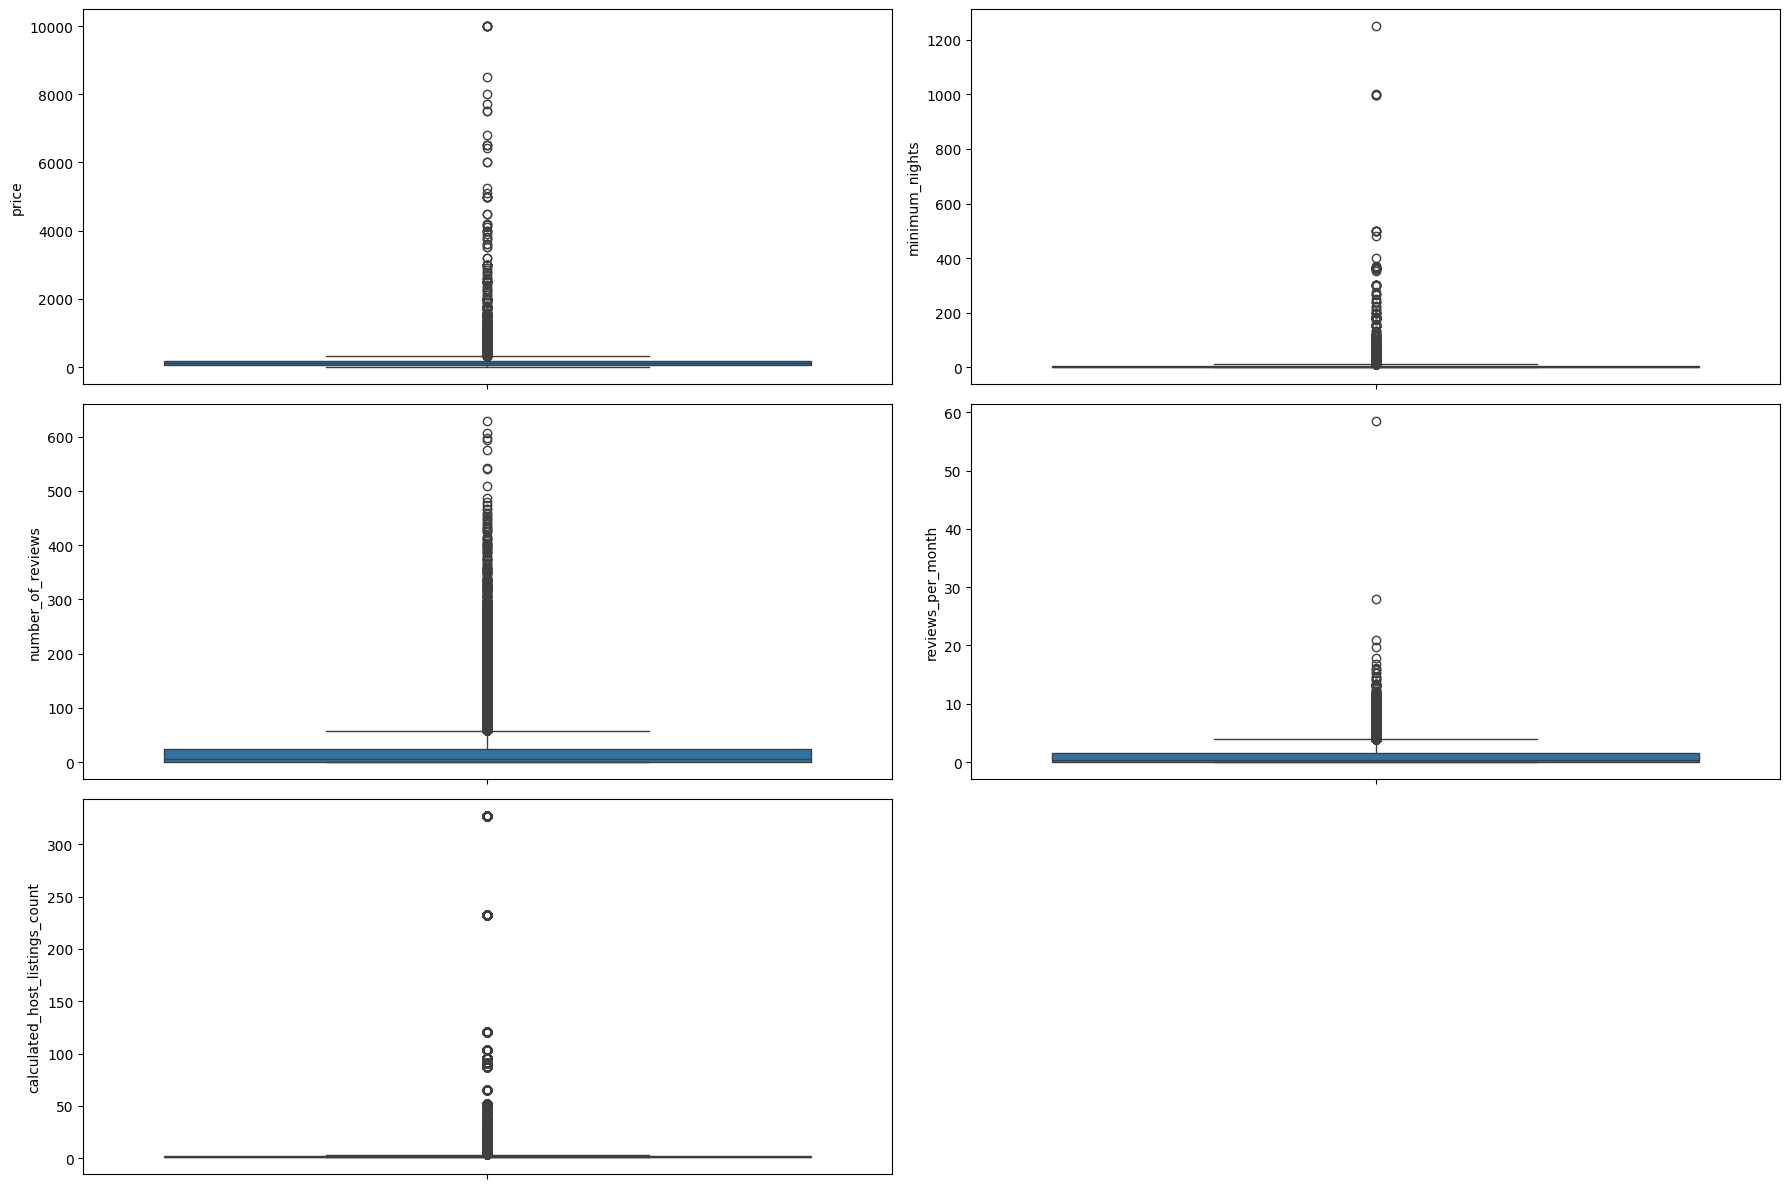

In [486]:
# Assuming that columns = ["price","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count"] are correct to analized the outliers.
fig, axis = plt.subplots(3, 2, figsize = (18, 12))
sns.boxplot(ax = axis[0, 0], data = airbnb_data, y = "price")
sns.boxplot(ax = axis[0, 1], data = airbnb_data, y = "minimum_nights")
sns.boxplot(ax = axis[1, 0], data = airbnb_data, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 1], data = airbnb_data, y = "reviews_per_month")
sns.boxplot(ax = axis[2, 0],  data=airbnb_data, y = "calculated_host_listings_count")
axis[2, 1].axis('off')
plt.tight_layout()
plt.savefig(r"/Users/nandapop/Documents/Bootcamp/airbnbNY/machine-learning-python-template/data/outliers_analisis.png")
plt.show()

In [487]:
price_stats = airbnb_data["price"].describe()
minimum_nights_stats = airbnb_data["minimum_nights"].describe()
number_of_reviews_stats = airbnb_data["number_of_reviews"].describe()
reviews_per_month_stats = airbnb_data["reviews_per_month"].describe()
calculated_host_listings_count_stats = airbnb_data["calculated_host_listings_count"].describe()
print("\n",price_stats)
print("\n",minimum_nights_stats)
print("\n",number_of_reviews_stats)
print("\n",reviews_per_month_stats)
print("\n",calculated_host_listings_count_stats)


 count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

 count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

 count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

 count    48895.000000
mean         1.090910
std          1.597283
min          0.000000
25%          0.040000
50%          0.370000
75%          1.580000
max         58.500000
Name: reviews_per_month, dtype: float64

 count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%      

In [496]:
def find_outliers(cols):
    outliers_dic = {}
    for col in cols:
        q1 = airbnb_data[col].quantile(0.25)
        q3 = airbnb_data[col].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + (1.5 * iqr)
        lower_limit = q1 - (1.5 * iqr)
        outliers_dic[col] = {"lower_limit":lower_limit, "upper_limit":upper_limit}
    return outliers_dic
      
outliers_variables = find_outliers(["price","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count"])
''' reminder: for key, value in numbers.items(): print{key}'''
#no_factorized_values = ["room_type", "neighbourhood_group", "neighbourhood"] # I have to add the non factorized values, because I can get 
columns = ["room_type", "neighbourhood_group", "neighbourhood","price","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count"]
for key, value in outliers_variables.items():
    print(f"Outliers for column {key}")
    print(f"Lower limit: {round(value['lower_limit'], 2)}")
    print(f"Upper limit: {round(value['upper_limit'], 2)}")
    print(f"Extreme value for : {key}")
   #.sort_values("price", ascending=False)
    extreme_values = airbnb_data[airbnb_data[key] > value['upper_limit']].loc[:,columns].head(10)
    print(extreme_values)

Outliers for column price
Lower limit: -90.0
Upper limit: 334.0
Extreme value for : price
           room_type neighbourhood_group     neighbourhood  price  \
61   Entire home/apt           Manhattan           Chelsea    375   
85   Entire home/apt            Brooklyn  Brooklyn Heights    800   
103  Entire home/apt           Manhattan      West Village    500   
114  Entire home/apt           Manhattan      East Village    350   
121  Entire home/apt            Brooklyn       South Slope    400   
158  Entire home/apt            Brooklyn       Boerum Hill    475   
181  Entire home/apt              Queens         Ridgewood    350   
233  Entire home/apt           Manhattan              SoHo    500   
242  Entire home/apt           Manhattan           Chelsea    500   
263  Entire home/apt           Manhattan      East Village    390   

     minimum_nights  number_of_reviews  reviews_per_month  \
61              180                  5               0.12   
85                1         

my outliers columns ["price","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count"]
I keept the outlier price, because this correspond to luxury Entire home/apt           Manhattan           Chelsea    500 
minimum_nights : 
to rest of the columns (minimum_nights, number_of_reviews, reviews_per_month ,calculated_host_listings_count), I cant not as

Missing value analysis

In [508]:
airbnb_data.isnull().sum().sort_values(ascending=False)
#there are no  missing values

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
room_type_f                       0
neighbourhood_group_f             0
neighbourhood_f                   0
dtype: int64

Feature scaling

In [499]:
'''we want to predict price '''
num_variables = ["minimum_nights", "number_of_reviews", "reviews_per_month"]

x = airbnb_data.drop("price", axis = 1)[num_variables]
y = airbnb_data["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

x_train.head()


,minimum_nights,number_of_reviews,reviews_per_month
32645,3,11,0.87
23615,2,2,0.16
31183,2,0,0.00
29260,3,87,4.91
7275,5,13,0.25


Normalization

In [501]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_norm = scaler.transform(x_train)
x_train_norm = pd.DataFrame(x_train_norm, index = x_train.index, columns = num_variables)

x_test_norm = scaler.transform(x_test)
x_test_norm = pd.DataFrame(x_test_norm, index = x_test.index, columns = num_variables)

x_train_norm.head()

,minimum_nights,number_of_reviews,reviews_per_month
32645,-0.193025,-0.277198,-0.139866
23615,-0.239596,-0.479451,-0.582446
31183,-0.239596,-0.524396,-0.682182
29260,-0.193025,1.430714,2.378478
7275,-0.099884,-0.232253,-0.526344


In [502]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scal = scaler.transform(x_train)
x_train_scal = pd.DataFrame(x_train_scal, index = x_train.index, columns = num_variables)

x_test_scal = scaler.transform(x_test)
x_test_scal = pd.DataFrame(x_test_scal, index = x_test.index, columns = num_variables)

x_train_scal.head()

,minimum_nights,number_of_reviews,reviews_per_month
32645,0.001601,0.017488,0.014872
23615,0.000801,0.003180,0.002735
31183,0.000801,0.000000,0.000000
29260,0.001601,0.138315,0.083932
7275,0.003203,0.020668,0.004274


DAY 3
Step :Feature selection

In [503]:
selection_model = SelectKBest(f_classif, k = 3)
selection_model.fit(x_train_scal, y_train)
ix = selection_model.get_support()
x_train_sel = pd.DataFrame(selection_model.transform(x_train), columns = x_train.columns.values[ix])
x_test_sel = pd.DataFrame(selection_model.transform(x_test), columns = x_test.columns.values[ix])

x_train_sel.head()

,minimum_nights,number_of_reviews,reviews_per_month
0,3.0,11.0,0.87
1,2.0,2.0,0.16
2,2.0,0.0,0.00
3,3.0,87.0,4.91
4,5.0,13.0,0.25


In [504]:
x_test_sel.head()

,minimum_nights,number_of_reviews,reviews_per_month
0,3.0,62.0,0.71
1,21.0,0.0,0.00
2,2.0,17.0,0.43
3,2.0,5.0,1.88
4,2.0,30.0,0.80


In [505]:
x_train_sel["Price"] = list(y_train)
x_test_sel["Price"] = list(y_test)

In [506]:
x_train_sel.to_csv("/Users/nandapop/Documents/Bootcamp/airbnbNY/machine-learning-python-template/data/processed/clean_airbnb_train.csv", index=False)
x_test_sel.to_csv("/Users/nandapop/Documents/Bootcamp/airbnbNY/machine-learning-python-template/data/processed/clean_airbnb_test.csv", index=False)
